In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam




In [3]:
# Load the data
train = pd.read_csv('monks-1.train')
test = pd.read_csv('monks-1.test')

# Split features and labels
X_train = train.drop(train.columns[0], axis=1)
y_train = train.iloc[:, [0]]
X_test = test.drop(test.columns[0], axis=1)
y_test = test.iloc[:, [0]]


In [4]:
def create_model(optimizer):
    model = Sequential()
#     model.add(Input(shape=(6,)))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [5]:
# Define optimizers
sgd = SGD(learning_rate=0.01)
adam = Adam(learning_rate=0.01)

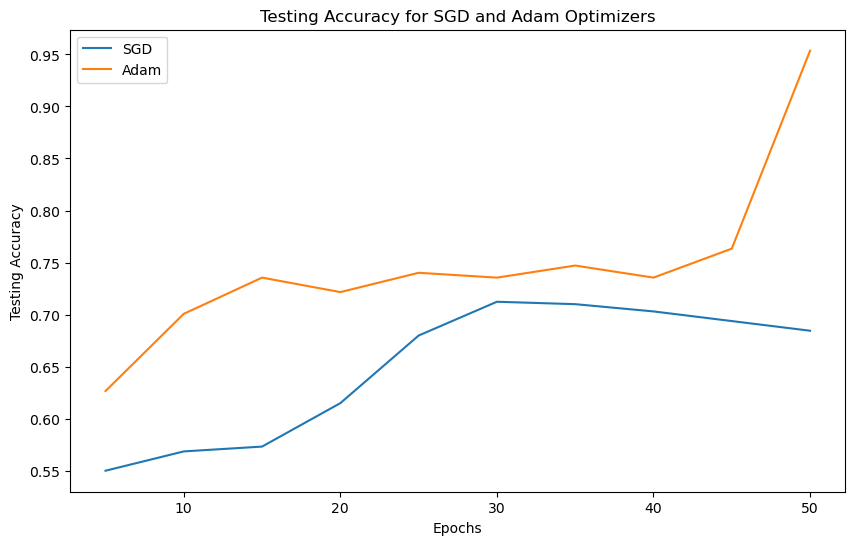

In [6]:
def train_and_evaluate(optimizer):
    model = create_model(optimizer)
    accuracy = []
    for epoch in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        model.fit(X_train, y_train, epochs=epoch, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        accuracy.append(acc)
    return accuracy

# Train models and collect accuracy
sgd_accuracy = train_and_evaluate(sgd)
adam_accuracy = train_and_evaluate(adam)

# Define epochs
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, sgd_accuracy, label='SGD')
plt.plot(epochs, adam_accuracy, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for SGD and Adam Optimizers')
plt.legend()
plt.show()